## This code is going to build an autoencoder to predict risk index of gird_50. and after that it will reconstruct and plot and so on

In [1]:
import geopandas as gpd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import os


2025-09-14 18:09:04.991416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757891345.014686 1535744 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757891345.021819 1535744 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757891345.040783 1535744 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757891345.040813 1535744 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757891345.040816 1535744 computation_placer.cc:177] computation placer alr

In [2]:
grid_50 = gpd.read_file('/home/emine2/R121/Wainwright/grid_50_risk_index.shp')
grid_50.head()

,risk_level,suitable_f,drained_la,excess_ice,ice_wedge_,contaminat,building,road,infra_exis,infra_type,erosion_ex,erosion_ye,risk_index,geometry
0,0.0,True,NaN,0.190489,0,None,0,0,0,None,0,None,0.0000,"POLYGON ((-230847.77 2301199.894, -230847.77 2..."
1,0.0,True,NaN,0.178978,0,None,0,0,0,None,0,None,0.0000,"POLYGON ((-230797.77 2301199.894, -230797.77 2..."
2,0.0,True,NaN,0.190013,0,None,0,0,0,None,0,None,0.0000,"POLYGON ((-230797.77 2301249.894, -230797.77 2..."
3,0.0,True,NaN,0.208342,0,None,0,0,0,None,0,None,0.1875,"POLYGON ((-230797.77 2301299.894, -230797.77 2..."
4,0.0,True,NaN,0.237193,0,None,0,0,0,None,0,None,0.1875,"POLYGON ((-230797.77 2301349.894, -230797.77 2..."


In [3]:
grid_50.describe()

,risk_level,drained_la,excess_ice,ice_wedge_,building,road,infra_exis,erosion_ex,risk_index
count,13532.0,8589.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000
mean,0.0,0.205643,0.250249,0.900754,0.016258,0.031998,0.053059,0.019362,0.422572
std,0.0,0.280428,0.090943,0.299003,0.126470,0.176002,0.224160,0.137797,0.185534
min,0.0,0.000000,0.003188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.190503,1.000000,0.000000,0.000000,0.000000,0.000000,0.375000
50%,0.0,0.000000,0.251112,1.000000,0.000000,0.000000,0.000000,0.000000,0.375000
75%,0.0,0.437500,0.309508,1.000000,0.000000,0.000000,0.000000,0.000000,0.562500
max,0.0,1.000000,0.702111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2025-09-14 18:09:29.710108: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-09-14 18:09:29.710155: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-09-14 18:09:29.710164: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-09-14 18:09:29.710172: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-09-14 18:09:29.710180: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: cpsc-nfmartin-1.cropsci.illinois.edu
2025-09-14 18:09:29.710186: I external/local_xla/x

Epoch 1/30


2025-09-14 18:09:36.679157: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2904621056 exceeds 10% of free system memory.
2025-09-14 18:09:38.857563: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2904621056 exceeds 10% of free system memory.
2025-09-14 18:09:39.959935: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2904621056 exceeds 10% of free system memory.
2025-09-14 18:09:39.960000: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26141589504 exceeds 10% of free system memory.
2025-09-14 18:09:39.960017: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26141589504 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 49s 49s/step - loss: 0.2501 - val_loss: 0.2495
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 42s 42s/step - loss: 0.2495 - val_loss: 0.2488
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - loss: 0.2488 - val_loss: 0.2481
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 57s 57s/step - loss: 0.2481 - val_loss: 0.2472
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 51s 51s/step - loss: 0.2472 - val_loss: 0.2462
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - loss: 0.2462 - val_loss: 0.2449
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 54s 54s/step - loss: 0.2449 - val_loss: 0.2434
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - loss: 0.2434 - val_loss: 0.2414
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - loss: 0.2414 - val_loss: 0.2389
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 42s 42s/step - loss: 0.2389 - val_loss: 0.2358
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step - loss: 0.2358 - val_loss: 0.2319
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 42s 42s/step - loss: 0.2319 - val_loss: 0.2269
Epoch 13/30


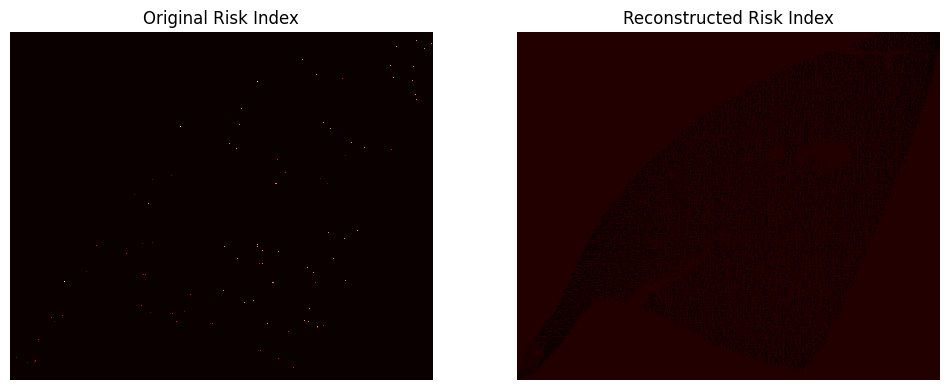

In [4]:

# Disable GPU to avoid CUDA errors
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Prepare numeric columns
grid_50['contaminat_num'] = (grid_50['contaminat'] == 'Open').astype(float)
grid_50['drained_la'] = grid_50['drained_la'].fillna(0)
grid_50['excess_ice'] = grid_50['excess_ice'].fillna(0)  # Assuming no NaNs after previous filtering
grid_50['ice_wedge_'] = grid_50['ice_wedge_'].fillna(0)
grid_50['infra_exis'] = grid_50['infra_exis'].fillna(0)
grid_50['erosion_ex'] = grid_50['erosion_ex'].fillna(0)

# Extract min_x and min_y from bounds
grid_50['min_x'] = grid_50.geometry.bounds.minx
grid_50['min_y'] = grid_50.geometry.bounds.miny

# Get unique sorted x and y (y descending for row 0 at top)
unique_x = sorted(grid_50['min_x'].unique())
unique_y = sorted(grid_50['min_y'].unique(), reverse=True)

# Dictionaries for row and col indices
col_dict = {x: i for i, x in enumerate(unique_x)}
row_dict = {y: i for i, y in enumerate(unique_y)}

# Assign row and col to grid_50
grid_50['col'] = grid_50['min_x'].map(col_dict)
grid_50['row'] = grid_50['min_y'].map(row_dict)

# Dimensions
height = len(unique_y)
width = len(unique_x)

# Channel variables (7 including risk_index as the last)
channel_vars = ['drained_la', 'excess_ice', 'ice_wedge_', 'contaminat_num', 'infra_exis', 'erosion_ex', 'risk_index']

# Create 2D arrays for each channel
arrays = []
for var in channel_vars:
    arr = np.zeros((height, width))
    for _, row in grid_50.iterrows():
        arr[row['row'], row['col']] = row[var]
    arrays.append(arr)

# Stack to 3D array (height, width, 7)
full_data = np.stack(arrays, axis=-1)

# Function to pad array to be divisible by 4
def pad_array(data, divisor=4):
    h, w, c = data.shape
    pad_h = (divisor - h % divisor) % divisor
    pad_w = (divisor - w % divisor) % divisor
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    padded = np.pad(data, ((top, bottom), (left, right), (0, 0)), mode='constant', constant_values=0)
    return padded, (top, bottom, left, right)

# Pad the full data
padded_full, pads = pad_array(full_data)

# Create noisy input by zeroing the risk_index channel (last channel)
noisy = padded_full.copy()
noisy[..., -1] = 0

# Add batch dimension (using the same data for train and test as per description)
X_train = noisy[np.newaxis, ...]  # (1, padded_h, padded_w, 7)
y_train = padded_full[np.newaxis, ...]
X_test = X_train
y_test = y_train

# Define the autoencoder model
input_shape = padded_full.shape  # (padded_h, padded_w, 7)
input_img = Input(shape=input_shape)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(7, (3, 3), activation='sigmoid', padding='same')(x)  # Output 7 channels

# Create and compile model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
history = autoencoder.fit(X_train, y_train, epochs=30, batch_size=1, validation_data=(X_test, y_test))

# Predict on test data
reconstructed = autoencoder.predict(X_test)

# Function to unpad array
def unpad_array(data, pads):
    top, bottom, left, right = pads
    return data[top : -bottom if bottom > 0 else None, left : -right if right > 0 else None]

# Extract the risk channel (channel 6, 0-indexed)
true_risk_padded = y_test[0, ..., 6]
pred_risk_padded = reconstructed[0, ..., 6]

# Unpad
true_risk = unpad_array(true_risk_padded, pads)
pred_risk = unpad_array(pred_risk_padded, pads)

# Flatten for metrics
true_flat = true_risk.flatten()
pred_flat = pred_risk.flatten()

# Compute metrics
mse = mean_squared_error(true_flat, pred_flat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_flat, pred_flat)
r, _ = pearsonr(true_flat, pred_flat)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'Pearson correlation: {r:.3f}')

# Plot original vs reconstructed risk index
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(true_risk, cmap='hot', interpolation='nearest')
axs[0].set_title('Original Risk Index')
axs[0].axis('off')
axs[1].imshow(pred_risk, cmap='hot', interpolation='nearest')
axs[1].set_title('Reconstructed Risk Index')
axs[1].axis('off')
plt.show()

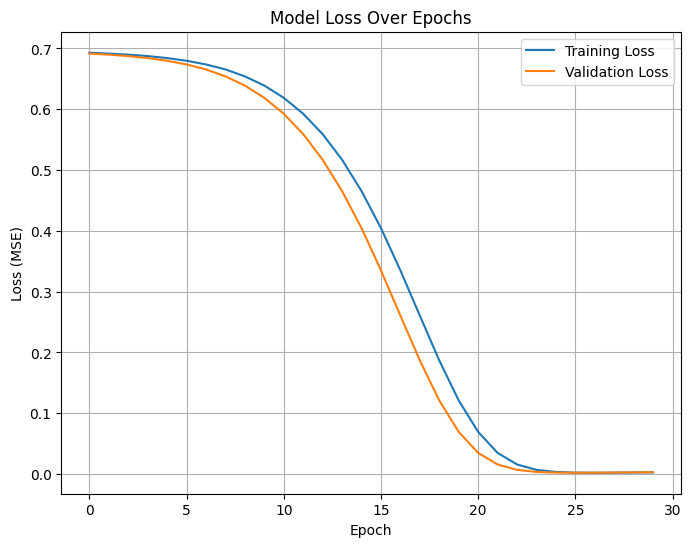

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 59s 59s/step - loss: 0.6930 - val_loss: 0.6916
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 44s 44s/step - loss: 0.6916 - val_loss: 0.6898
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 48s 48s/step - loss: 0.6898 - val_loss: 0.6875
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step - loss: 0.6875 - val_loss: 0.6842
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 43s 43s/step - loss: 0.6842 - val_loss: 0.6798
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - loss: 0.6798 - val_loss: 0.6737
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 44s 44s/step - loss: 0.6737 - val_loss: 0.6655
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 44s 44s/step - loss: 0.6655 - val_loss: 0.6541
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - loss: 0.6541 - val_loss: 0.6389
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - loss: 0.6389 - val_loss: 0.6188
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - loss: 0.6188 - val_loss: 0.5926
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 44s 44s/step - loss: 0.5926 - val_loss: 0.5590
E

/tmp/ipykernel_1535744/3376396782.py:154: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(true_flat, pred_flat)


MSE: 0.3162
RMSE: 0.5624
MAE: 0.5623
Pearson correlation: nan


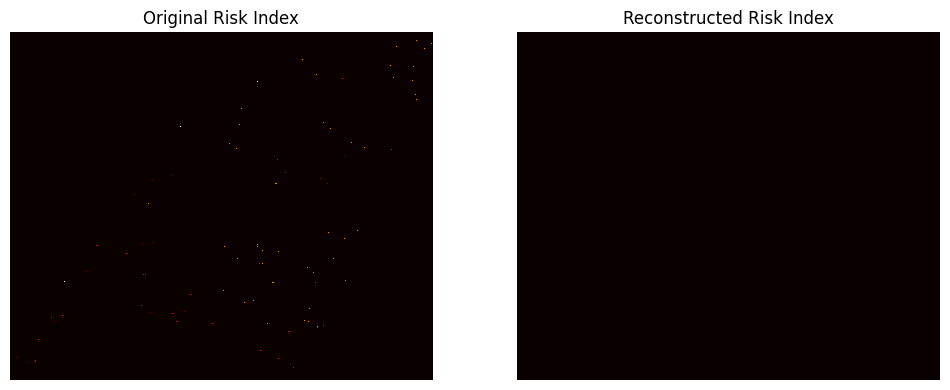

In [8]:
import geopandas as gpd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import os

# Disable GPU to avoid CUDA errors
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Assuming grid_50 is already loaded; if not, uncomment below
# grid_50 = gpd.read_file('/home/emine2/R121/Wainwright/grids/wainwright_grid_50m.shp')

# Prepare numeric columns
grid_50['contaminat_num'] = (grid_50['contaminat'] == 'Open').astype(float)
grid_50['drained_la'] = grid_50['drained_la'].fillna(0)
grid_50['excess_ice'] = grid_50['excess_ice'].fillna(0)  # Assuming no NaNs after previous filtering
grid_50['ice_wedge_'] = grid_50['ice_wedge_'].fillna(0)
grid_50['infra_exis'] = grid_50['infra_exis'].fillna(0)
grid_50['erosion_ex'] = grid_50['erosion_ex'].fillna(0)

# Define the category mapping (due to float precision, use rounding or thresholds)
categories = [0.0, 0.1875, 0.375, 0.5625, 1.0]
def map_to_category(value):
    # Find closest category
    diffs = np.abs(np.array(categories) - value)
    return np.argmin(diffs)

grid_50['risk_category'] = grid_50['risk_index'].apply(map_to_category)

# Extract min_x and min_y from bounds
grid_50['min_x'] = grid_50.geometry.bounds.minx
grid_50['min_y'] = grid_50.geometry.bounds.miny

# Get unique sorted x and y (y descending for row 0 at top)
unique_x = sorted(grid_50['min_x'].unique())
unique_y = sorted(grid_50['min_y'].unique(), reverse=True)

# Dictionaries for row and col indices
col_dict = {x: i for i, x in enumerate(unique_x)}
row_dict = {y: i for i, y in enumerate(unique_y)}

# Assign row and col to grid_50
grid_50['col'] = grid_50['min_x'].map(col_dict)
grid_50['row'] = grid_50['min_y'].map(row_dict)

# Dimensions
height = len(unique_y)
width = len(unique_x)

# Feature channel variables (6 features)
feature_vars = ['drained_la', 'excess_ice', 'ice_wedge_', 'contaminat_num', 'infra_exis', 'erosion_ex']

# Create 2D arrays for features
feature_arrays = []
for var in feature_vars:
    arr = np.zeros((height, width))
    for _, row in grid_50.iterrows():
        arr[row['row'], row['col']] = row[var]
    feature_arrays.append(arr)

# Create one-hot encoded arrays for risk categories (5 channels)
num_categories = len(categories)
category_arrays = [np.zeros((height, width)) for _ in range(num_categories)]
for _, row in grid_50.iterrows():
    cat_idx = row['risk_category']
    category_arrays[cat_idx][row['row'], row['col']] = 1.0

# Stack features + category channels (height, width, 6 + 5 = 11)
full_data = np.stack(feature_arrays + category_arrays, axis=-1)

# Function to pad array to be divisible by 4
def pad_array(data, divisor=4):
    h, w, c = data.shape
    pad_h = (divisor - h % divisor) % divisor
    pad_w = (divisor - w % divisor) % divisor
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    padded = np.pad(data, ((top, bottom), (left, right), (0, 0)), mode='constant', constant_values=0)
    return padded, (top, bottom, left, right)

# Pad the full data
padded_full, pads = pad_array(full_data)

# Create noisy input by zeroing the risk category channels (last 5 channels)
noisy = padded_full.copy()
noisy[..., -num_categories:] = 0

# Add batch dimension (using the same data for train and test as per description)
X_train = noisy[np.newaxis, ...]  # (1, padded_h, padded_w, 11)
y_train = padded_full[np.newaxis, ...]
X_test = X_train
y_test = y_train

# Define the autoencoder model
input_shape = padded_full.shape  # (padded_h, padded_w, 11)
input_img = Input(shape=input_shape)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(11, (3, 3), activation='sigmoid', padding='same')(x)  # Output 11 channels

# Create and compile model with binary_crossentropy for one-hot categories
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(X_train, y_train, epochs=30, batch_size=1, validation_data=(X_test, y_test))

# Predict on test data
reconstructed = autoencoder.predict(X_test)

# Function to unpad array
def unpad_array(data, pads):
    top, bottom, left, right = pads
    return data[top : -bottom if bottom > 0 else None, left : -right if right > 0 else None]

# Extract the risk category channels (last 5, 0-indexed)
true_cat_padded = y_test[0, ..., -num_categories:]
pred_cat_padded = reconstructed[0, ..., -num_categories:]

# Unpad
true_cat = unpad_array(true_cat_padded, pads)
pred_cat = unpad_array(pred_cat_padded, pads)

# Get predicted categories by argmax and map back to original values
true_labels = np.argmax(true_cat, axis=-1)
pred_labels = np.argmax(pred_cat, axis=-1)
true_values = np.array(categories)[true_labels]
pred_values = np.array(categories)[pred_labels]

# Flatten for metrics
true_flat = true_values.flatten()
pred_flat = pred_values.flatten()

# Compute metrics on the mapped values
mse = mean_squared_error(true_flat, pred_flat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_flat, pred_flat)
r, _ = pearsonr(true_flat, pred_flat)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'Pearson correlation: {r:.3f}')

# Plot original vs reconstructed risk index (using values)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(true_values, cmap='hot', interpolation='nearest')
axs[0].set_title('Original Risk Index')
axs[0].axis('off')
axs[1].imshow(pred_values, cmap='hot', interpolation='nearest')
axs[1].set_title('Reconstructed Risk Index')
axs[1].axis('off')
plt.show()

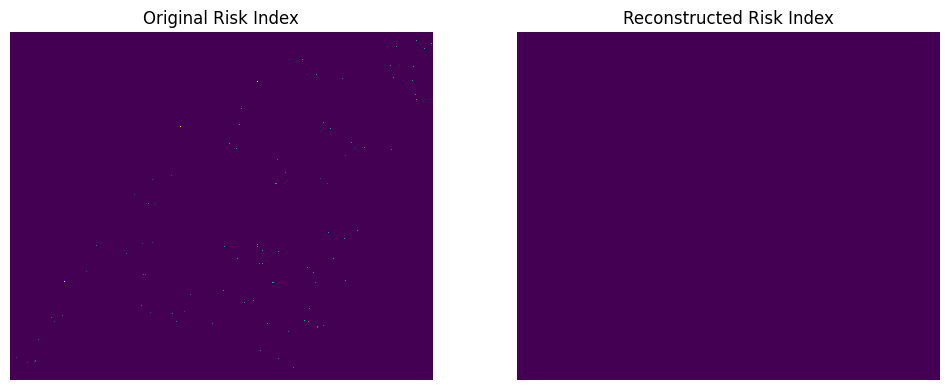

In [10]:
# Plot original vs reconstructed risk index (using values) with updated cmap and interpolation to match example
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(true_values, cmap='viridis', interpolation='nearest')
axs[0].set_title('Original Risk Index')
axs[0].axis('off')
axs[1].imshow(pred_values, cmap='viridis', interpolation='bilinear')
axs[1].set_title('Reconstructed Risk Index')
axs[1].axis('off')
plt.show()